In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import shap

D:\University\Task\42 - Sediment Discharge\sedis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
targets = ["Turbidity", "DO", "fChl"]

In [3]:
model_dirs = {
    "rf": "../models/rf/cross",
    "mlp": "../models/mlp/cross",
    "rfmlp": "../models/rfmlp",
    "rfmlp": "../models/rfmlp",
}

In [4]:
models = {}
for model_name, folder in model_dirs.items():
    if os.path.exists(folder):
        for file in os.listdir(folder):
            if file.endswith(".pkl"):
                bo = "bo" if "bo" in file else ""
                target = file.replace(".pkl", "").replace("bo", "").strip("_")   
                path = os.path.join(folder, file)
                with open(path, 'rb') as f:
                    models[f"{bo}{model_name}_{target}"] = pickle.load(f)
    else:
        print(f"Folder not found: {folder}")

print(f"Loaded {len(models)} models.")
print("Available models:", list(models.keys()))

Loaded 12 models.
Available models: ['rf_DO', 'rf_fChl', 'rf_Turbidity', 'mlp_DO', 'mlp_fChl', 'mlp_Turbidity', 'borfmlp_DO', 'borfmlp_fChl', 'borfmlp_Turbidity', 'rfmlp_DO', 'rfmlp_fChl', 'rfmlp_Turbidity']


In [5]:
bo_models = ['borfmlp_Turbidity', 'borfmlp_DO', 'borfmlp_fChl']

In [6]:
df = pd.read_csv('../dataset/data.csv')
data = df.select_dtypes(include=['float64', 'int64'])

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [01:07<00:00,  1.82it/s]


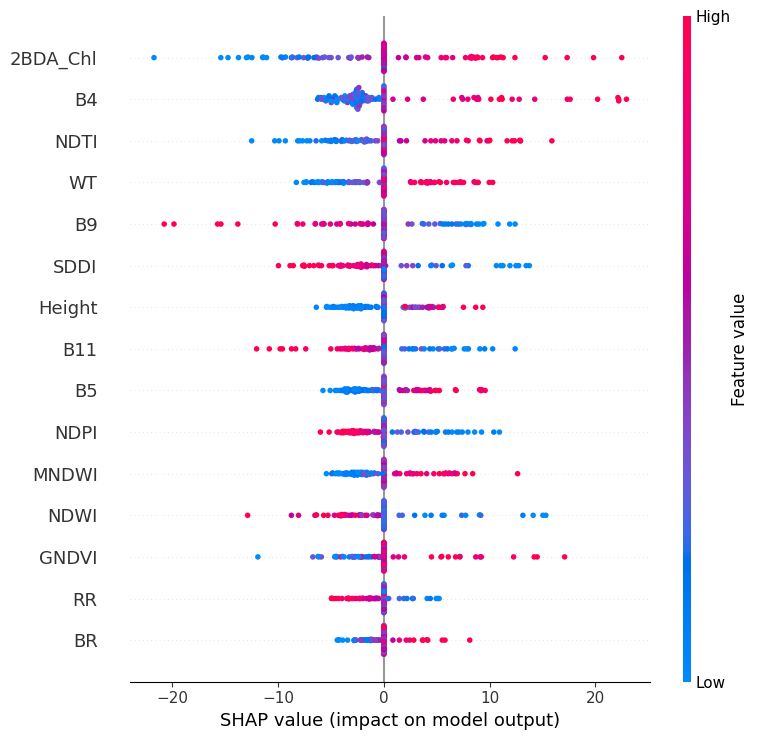

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [01:04<00:00,  1.92it/s]


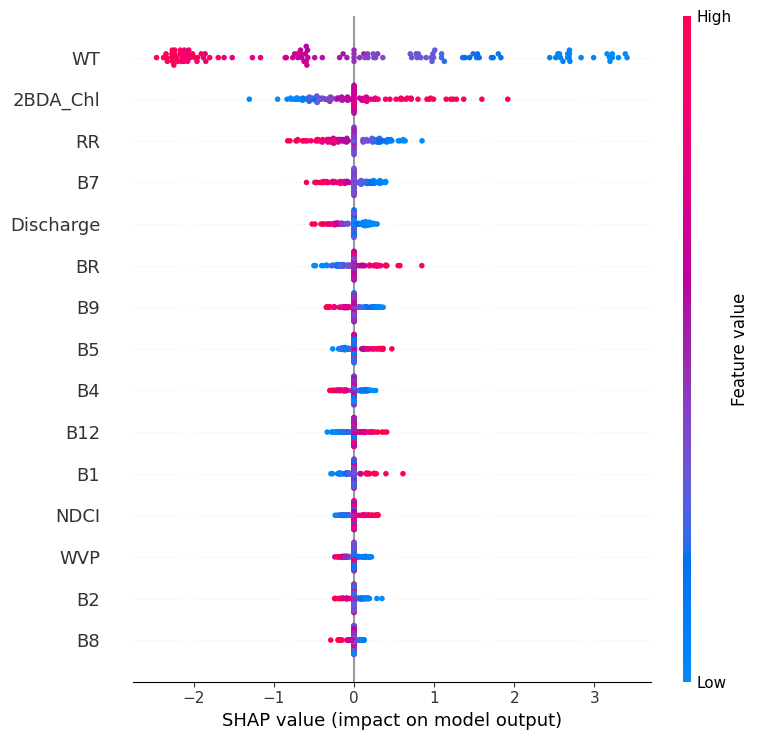

100%|████████████████████████████████████████████████████████████████████████████████| 123/123 [01:07<00:00,  1.82it/s]


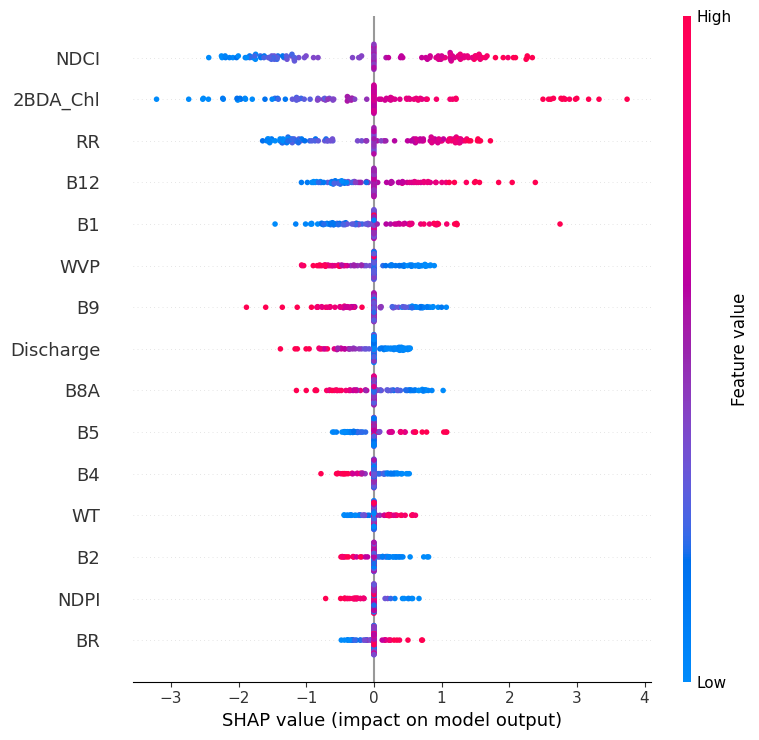

In [7]:
X = data.drop(targets, axis=1)
for target in targets:
    y = data[target]
    model = models['borfmlp_'+target]
    
    f = lambda x: model.predict(pd.DataFrame(x, columns=X.columns))

    X_background = shap.sample(X, 100, random_state=42)
    
    explainer = shap.KernelExplainer(f, X_background)
    shap_values = explainer.shap_values(X, nsamples=200)
    
    shap.summary_plot(shap_values, X, max_display=15)